In [6]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [4]:
X, y = make_classification(n_samples=100, n_features=5, n_redundant=0, n_informative=5,
                       random_state=1, n_clusters_per_class=1)

In [5]:
df = pd.DataFrame(X, columns=['col1', 'col2', 'col3', 'col4', 'col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.625710,1.813303,0.367320,-0.339441,0.067836,1
1,0.471816,0.276087,-0.878875,1.719979,-1.688976,1
2,-0.823788,-0.017555,0.556960,1.181078,0.373688,0
3,-0.732000,1.548925,-0.415684,-0.356664,1.920057,0
4,-2.631416,-0.186533,2.540679,4.360552,-0.834121,0


## for row sampling

In [76]:
def sample_rows(df, percent):
  return df.sample(int(percent*df.shape[0]), replace = True)

## for feature sampling

In [68]:
def sample_features(df, percent):
  cols = random.sample(df.columns.tolist()[:-1], int(percent*df.shape[1]))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

## for combined sampling

In [11]:
def combined_sampling(df, row_percent, col_percent):
  new_df = sample_rows(df, row_percent)
  return sample_features(new_df, col_percent)

In [77]:
df10 = sample_rows(df, 0.2)
df11 = sample_rows(df, 0.2)
df12 = sample_rows(df, 0.2)

In [78]:
df10.head()

,col1,col2,col3,col4,col5,target
71,-0.158319,2.294134,-0.074426,-0.218465,2.143850,0
79,-0.310252,2.157558,-1.337666,-1.188790,2.494558,0
16,-1.764693,0.127992,0.728264,-0.324658,-0.558511,1
14,-0.762774,0.539279,-0.165565,-0.786348,1.228650,0
73,-1.600991,1.769052,0.476838,-0.626031,0.520589,1


In [79]:
df10.shape

(20, 6)

In [80]:
from sklearn.tree import DecisionTreeClassifier
clf10 = DecisionTreeClassifier()
clf11 = DecisionTreeClassifier()
clf12 = DecisionTreeClassifier()

In [81]:
clf10.fit(df10.iloc[:,0:5], df10['target'])
clf11.fit(df11.iloc[:,0:5], df11['target'])
clf12.fit(df12.iloc[:,0:5], df12['target'])

DecisionTreeClassifier()

[Text(0.3333333333333333, 0.9, 'x[4] <= 0.208\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.16666666666666666, 0.7, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.5, 0.7, 'x[0] <= -2.608\ngini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6666666666666666, 0.5, 'x[0] <= -1.182\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.5, 0.3, 'x[0] <= -1.745\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.3, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]')]

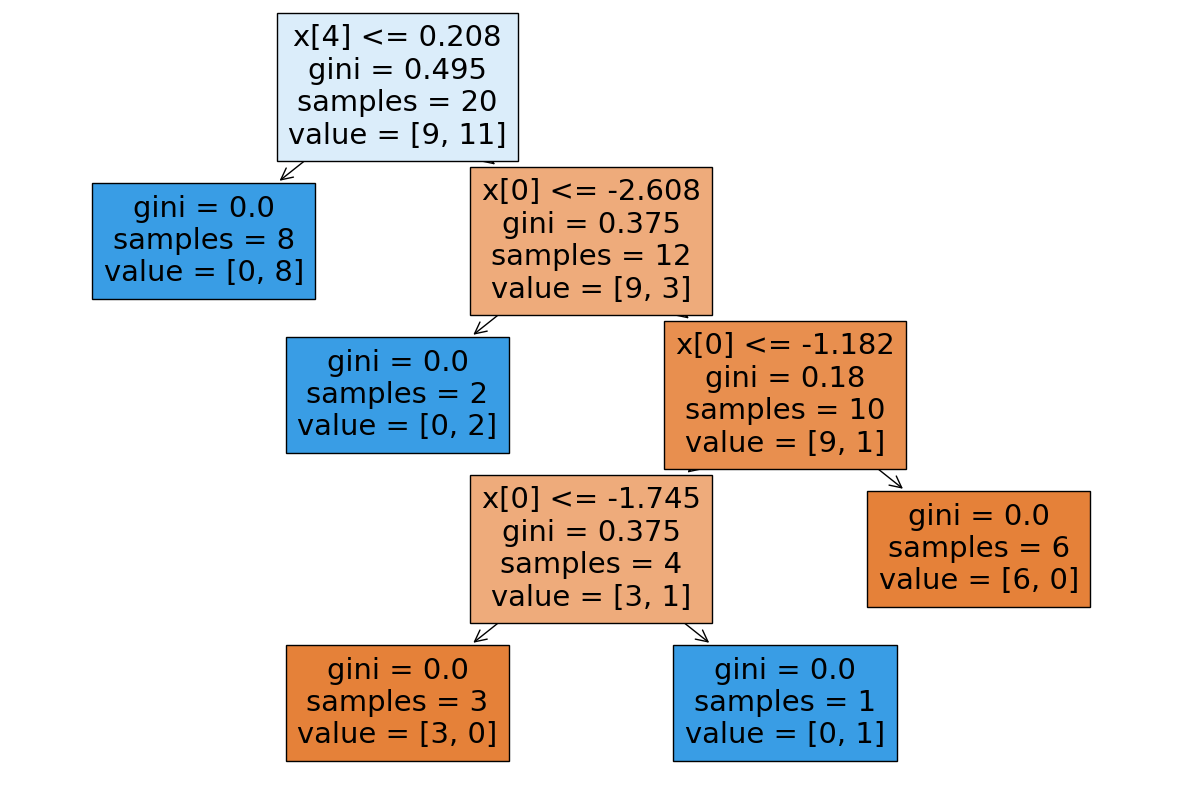

In [82]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(clf10, filled=True)

[Text(0.6, 0.8333333333333334, 'x[4] <= 0.578\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.4, 0.5, 'x[3] <= 1.893\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]')]

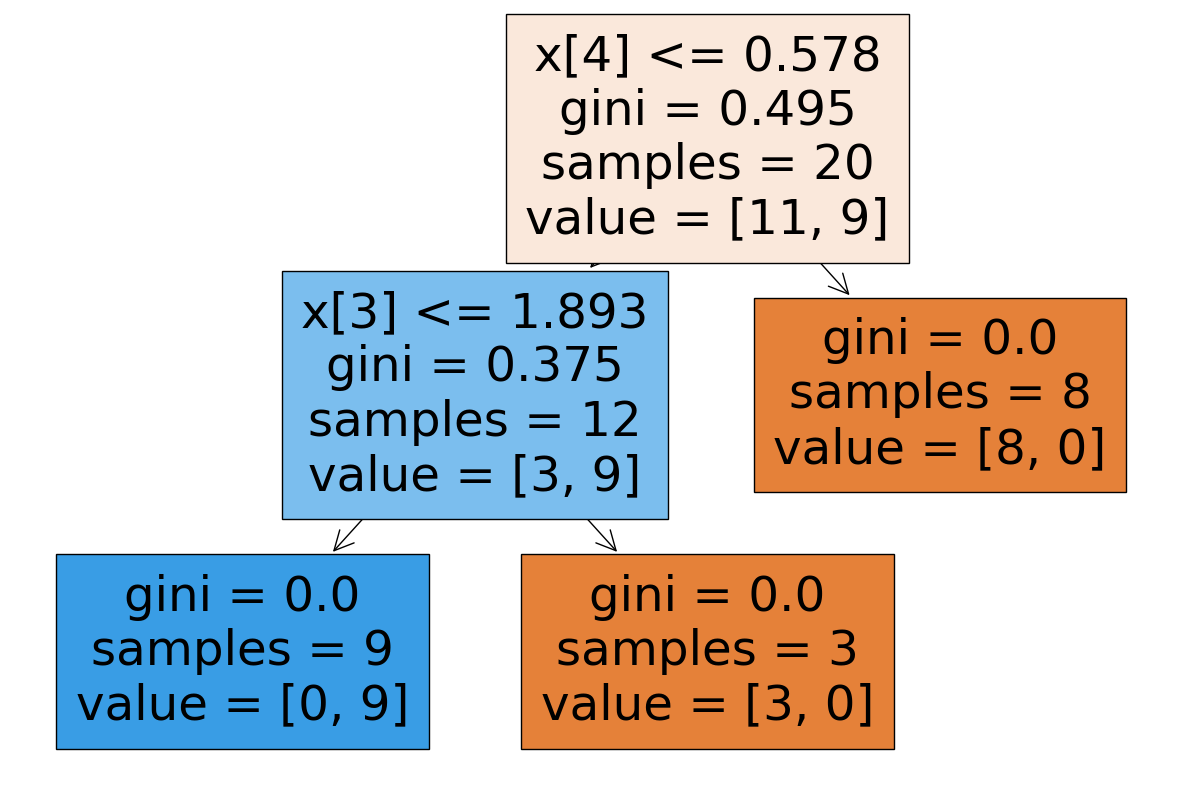

In [83]:
plt.figure(figsize=(15,10))
plot_tree(clf11, filled=True)

[Text(0.5, 0.875, 'x[4] <= -0.239\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.25, 0.625, 'x[1] <= -0.707\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.375, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.75, 0.625, 'x[3] <= 0.12\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.625, 0.375, 'x[2] <= -0.027\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]')]

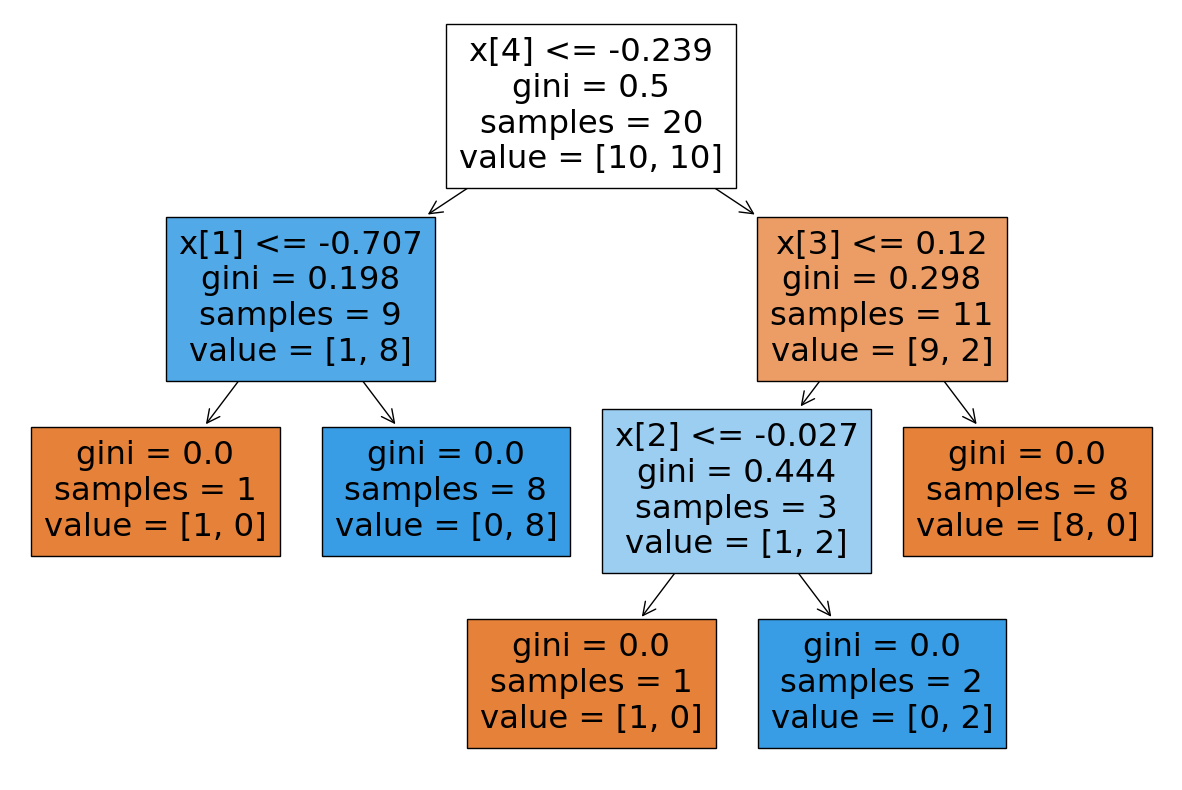

In [84]:
plt.figure(figsize=(15,10))
plot_tree(clf12, filled=True)

In [85]:
clf10.predict(np.array([-0.158319 ,	2.294134 ,	-0.074426 ,	-0.218465 ,	2.143850 	]).reshape(1,5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [86]:
clf11.predict(np.array([-0.158319 ,	2.294134 ,	-0.074426 ,	-0.218465 ,	2.143850 	]).reshape(1,5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [87]:
clf12.predict(np.array([-0.158319 ,	2.294134 ,	-0.074426 ,	-0.218465 ,	2.143850 	]).reshape(1,5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [88]:
df20 = sample_features(df, 0.8)
df21 = sample_features(df, 0.8)
df22 = sample_features(df, 0.8)

<ipython-input-68-ce07b8ef1217>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
<ipython-input-68-ce07b8ef1217>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
<ipython-input-68-ce07b8ef1217>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [89]:
df20.head()

,col3,col5,col4,col1,target
0,0.367320,0.067836,-0.339441,-1.625710,1
1,-0.878875,-1.688976,1.719979,0.471816,1
2,0.556960,0.373688,1.181078,-0.823788,0
3,-0.415684,1.920057,-0.356664,-0.732000,0
4,2.540679,-0.834121,4.360552,-2.631416,0


In [90]:
df20.shape

(100, 5)

In [97]:
from sklearn.tree import DecisionTreeClassifier
clf20 = DecisionTreeClassifier(random_state=0)
clf21 = DecisionTreeClassifier(random_state=0)
clf22 = DecisionTreeClassifier(random_state=0)

In [98]:
clf20.fit(df20.iloc[:,0:4], df20['target'])
clf21.fit(df21.iloc[:,0:4], df21['target'])
clf22.fit(df22.iloc[:,0:4], df22['target'])

DecisionTreeClassifier(random_state=0)

[Text(0.42857142857142855, 0.9166666666666666, 'x[1] <= 0.081\ngini = 0.5\nsamples = 100\nvalue = [49, 51]'),
 Text(0.21428571428571427, 0.75, 'x[0] <= 2.054\ngini = 0.194\nsamples = 46\nvalue = [5, 41]'),
 Text(0.14285714285714285, 0.5833333333333334, 'x[2] <= 2.242\ngini = 0.046\nsamples = 42\nvalue = [1, 41]'),
 Text(0.07142857142857142, 0.4166666666666667, 'gini = 0.0\nsamples = 39\nvalue = [0, 39]'),
 Text(0.21428571428571427, 0.4166666666666667, 'x[2] <= 2.75\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.14285714285714285, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2857142857142857, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2857142857142857, 0.5833333333333334, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6428571428571429, 0.75, 'x[3] <= -2.077\ngini = 0.302\nsamples = 54\nvalue = [44, 10]'),
 Text(0.42857142857142855, 0.5833333333333334, 'x[0] <= 2.017\ngini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(0.35714285714285715, 0.416666

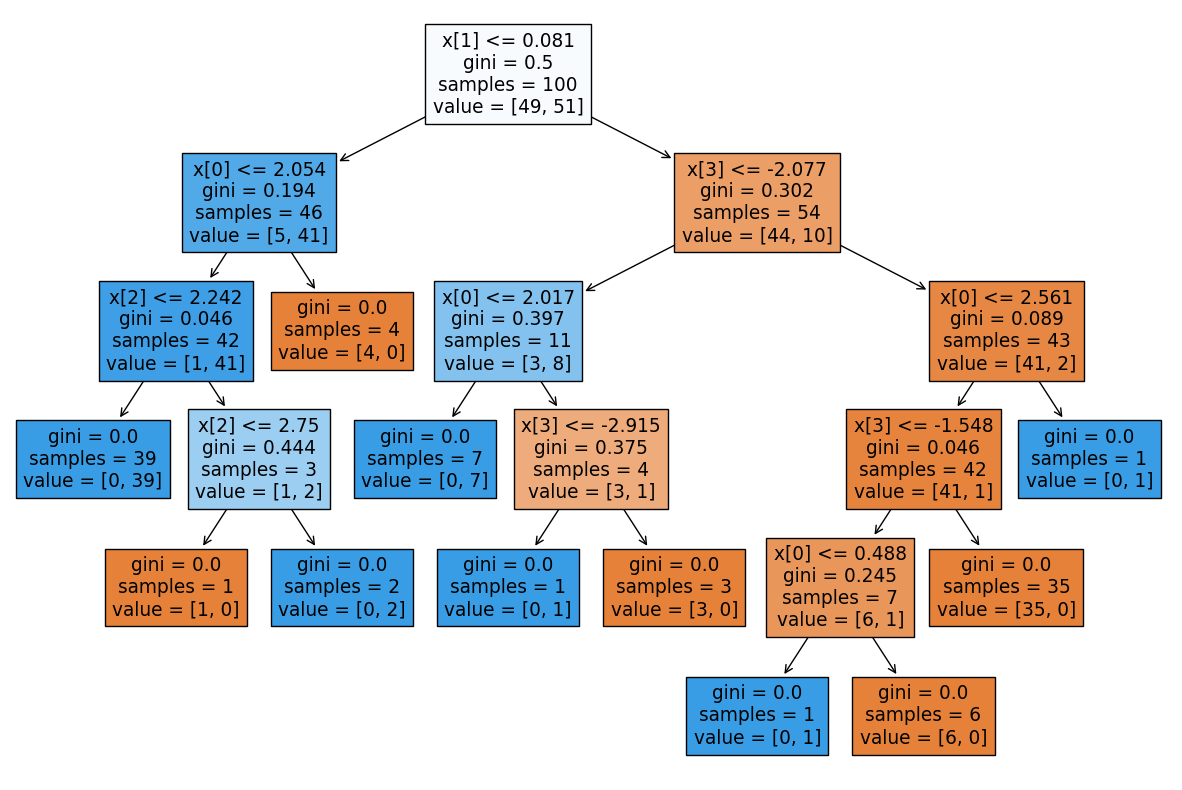

In [99]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(clf20, filled=True)

[Text(0.40625, 0.9285714285714286, 'x[0] <= -0.428\ngini = 0.5\nsamples = 100\nvalue = [49, 51]'),
 Text(0.14285714285714285, 0.7857142857142857, 'x[3] <= -0.17\ngini = 0.327\nsamples = 34\nvalue = [7, 27]'),
 Text(0.07142857142857142, 0.6428571428571429, 'x[0] <= -0.494\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.03571428571428571, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.10714285714285714, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.21428571428571427, 0.6428571428571429, 'x[0] <= -0.598\ngini = 0.071\nsamples = 27\nvalue = [1, 26]'),
 Text(0.17857142857142858, 0.5, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.25, 0.5, 'x[1] <= 1.409\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.21428571428571427, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2857142857142857, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6696428571428571, 0.7857142857142857, 'x[3] <= 0.222\ngini = 0.463\nsamp

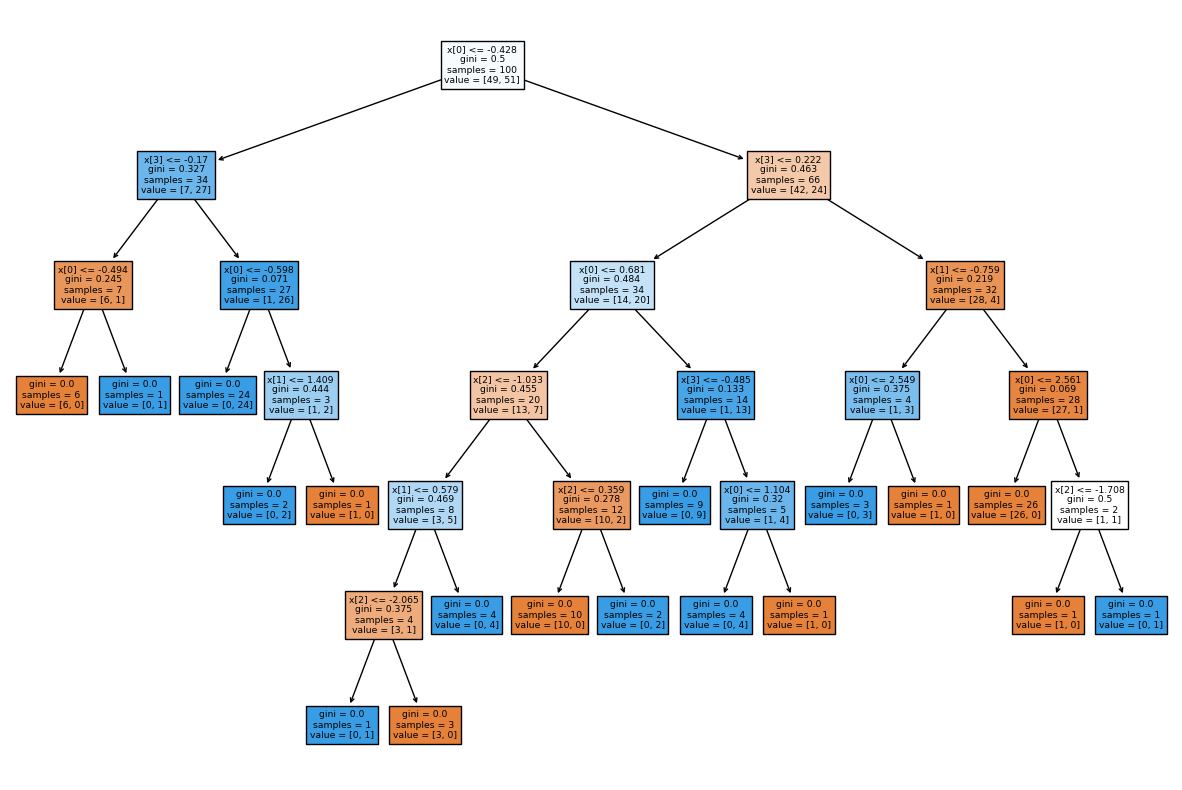

In [100]:
plt.figure(figsize=(15,10))
plot_tree(clf21, filled=True)

[Text(0.40625, 0.9285714285714286, 'x[2] <= -0.428\ngini = 0.5\nsamples = 100\nvalue = [49, 51]'),
 Text(0.14285714285714285, 0.7857142857142857, 'x[1] <= -0.17\ngini = 0.327\nsamples = 34\nvalue = [7, 27]'),
 Text(0.07142857142857142, 0.6428571428571429, 'x[0] <= -0.861\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.03571428571428571, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.10714285714285714, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.21428571428571427, 0.6428571428571429, 'x[2] <= -0.598\ngini = 0.071\nsamples = 27\nvalue = [1, 26]'),
 Text(0.17857142857142858, 0.5, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.25, 0.5, 'x[3] <= 1.409\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.21428571428571427, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2857142857142857, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6696428571428571, 0.7857142857142857, 'x[1] <= 0.222\ngini = 0.463\nsamp

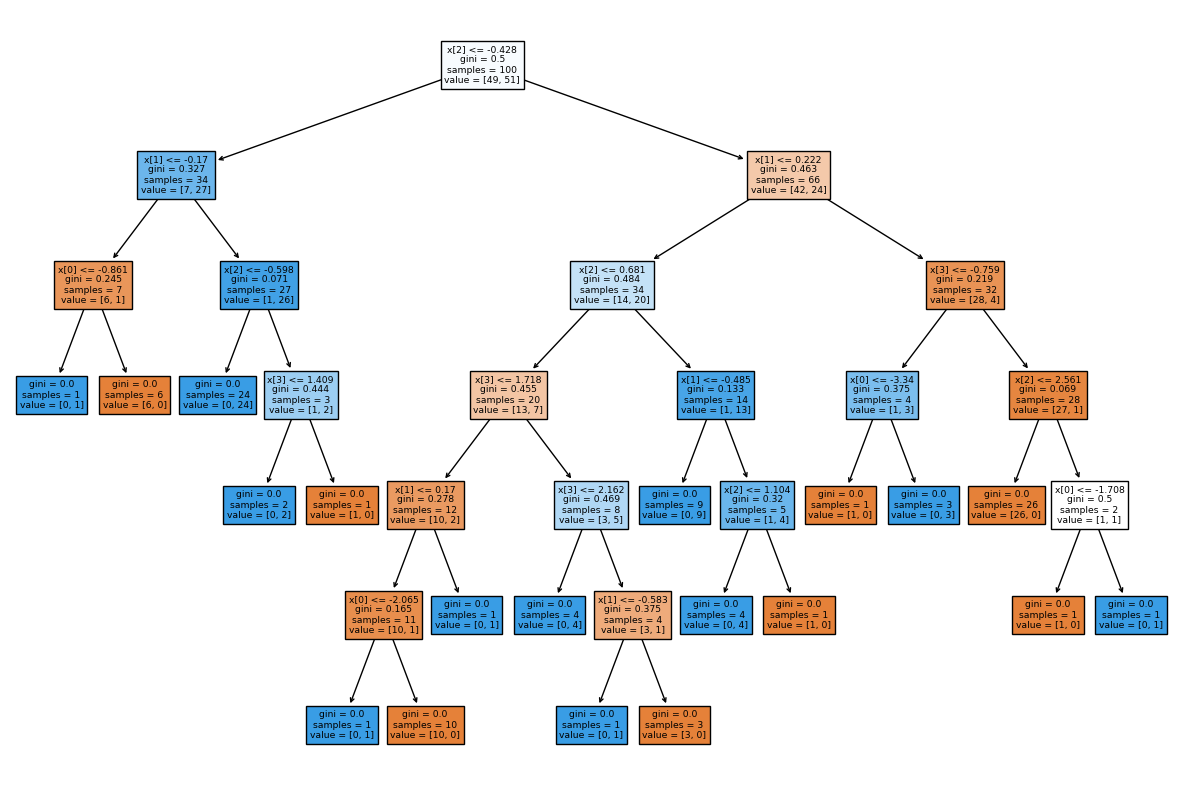

In [101]:
plt.figure(figsize=(15,10))
plot_tree(clf22, filled=True)

In [103]:
clf20.predict(np.array([0.367320 ,	0.067836 ,	-0.339441 ,	-1.625710 	]).reshape(1,4))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [104]:
clf21.predict(np.array([0.367320 ,	0.067836 ,	-0.339441 ,	-1.625710 	]).reshape(1,4))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [105]:
clf22.predict(np.array([0.367320 ,	0.067836 ,	-0.339441 ,	-1.625710 	]).reshape(1,4))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [119]:
df30 = combined_sampling(df, 0.5, 0.5)
df31 = combined_sampling(df, 0.5, 0.5)
df32 = combined_sampling(df, 0.5, 0.5)

<ipython-input-68-ce07b8ef1217>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
<ipython-input-68-ce07b8ef1217>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
<ipython-input-68-ce07b8ef1217>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [120]:
df30.shape

(50, 4)

In [121]:
df30.head()

,col2,col3,col1,target
71,2.294134,-0.074426,-0.158319,0
82,0.572114,-0.649638,-1.158571,1
43,1.026119,-2.173663,-1.165739,1
67,0.074708,1.181862,-0.923218,1
2,-0.017555,0.556960,-0.823788,0


In [110]:
from sklearn.tree import DecisionTreeClassifier
clf30 = DecisionTreeClassifier(random_state=0)
clf31 = DecisionTreeClassifier(random_state=0)
clf32 = DecisionTreeClassifier(random_state=0)

In [122]:
clf30.fit(df30.iloc[:,0:3], df30['target'])
clf31.fit(df31.iloc[:,0:3], df31['target'])
clf32.fit(df32.iloc[:,0:3], df32['target'])

DecisionTreeClassifier(random_state=0)

[Text(0.43333333333333335, 0.9285714285714286, 'x[2] <= -1.012\ngini = 0.461\nsamples = 50\nvalue = [18, 32]'),
 Text(0.2, 0.7857142857142857, 'x[1] <= 2.102\ngini = 0.278\nsamples = 30\nvalue = [5, 25]'),
 Text(0.13333333333333333, 0.6428571428571429, 'x[0] <= 0.573\ngini = 0.238\nsamples = 29\nvalue = [4, 25]'),
 Text(0.06666666666666667, 0.5, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.2, 0.5, 'x[0] <= 0.576\ngini = 0.375\nsamples = 16\nvalue = [4, 12]'),
 Text(0.13333333333333333, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.26666666666666666, 0.35714285714285715, 'x[1] <= 0.956\ngini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(0.2, 0.21428571428571427, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.3333333333333333, 0.21428571428571427, 'x[0] <= 0.935\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.26666666666666666, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4, 0.07142857142857142, 'gini = 0.0\nsam

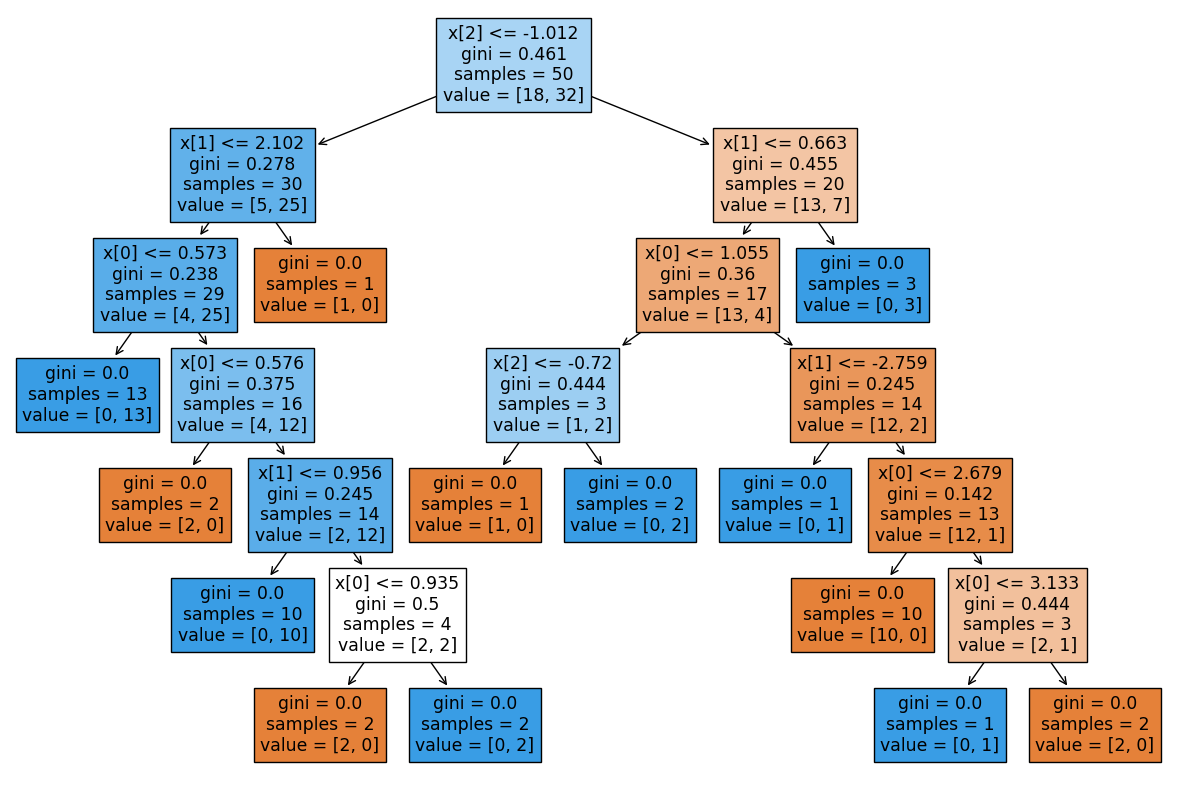

In [123]:
plt.figure(figsize=(15,10))
plot_tree(clf30, filled=True)

[Text(0.4230769230769231, 0.9285714285714286, 'x[0] <= -0.834\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.15384615384615385, 0.7857142857142857, 'x[0] <= -1.396\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.07692307692307693, 0.6428571428571429, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.23076923076923078, 0.6428571428571429, 'x[0] <= -1.286\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.15384615384615385, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3076923076923077, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6923076923076923, 0.7857142857142857, 'x[1] <= -1.327\ngini = 0.48\nsamples = 40\nvalue = [24, 16]'),
 Text(0.5384615384615384, 0.6428571428571429, 'x[0] <= 1.938\ngini = 0.491\nsamples = 23\nvalue = [10, 13]'),
 Text(0.46153846153846156, 0.5, 'x[0] <= 0.944\ngini = 0.305\nsamples = 16\nvalue = [3, 13]'),
 Text(0.38461538461538464, 0.35714285714285715, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.5384615384615384

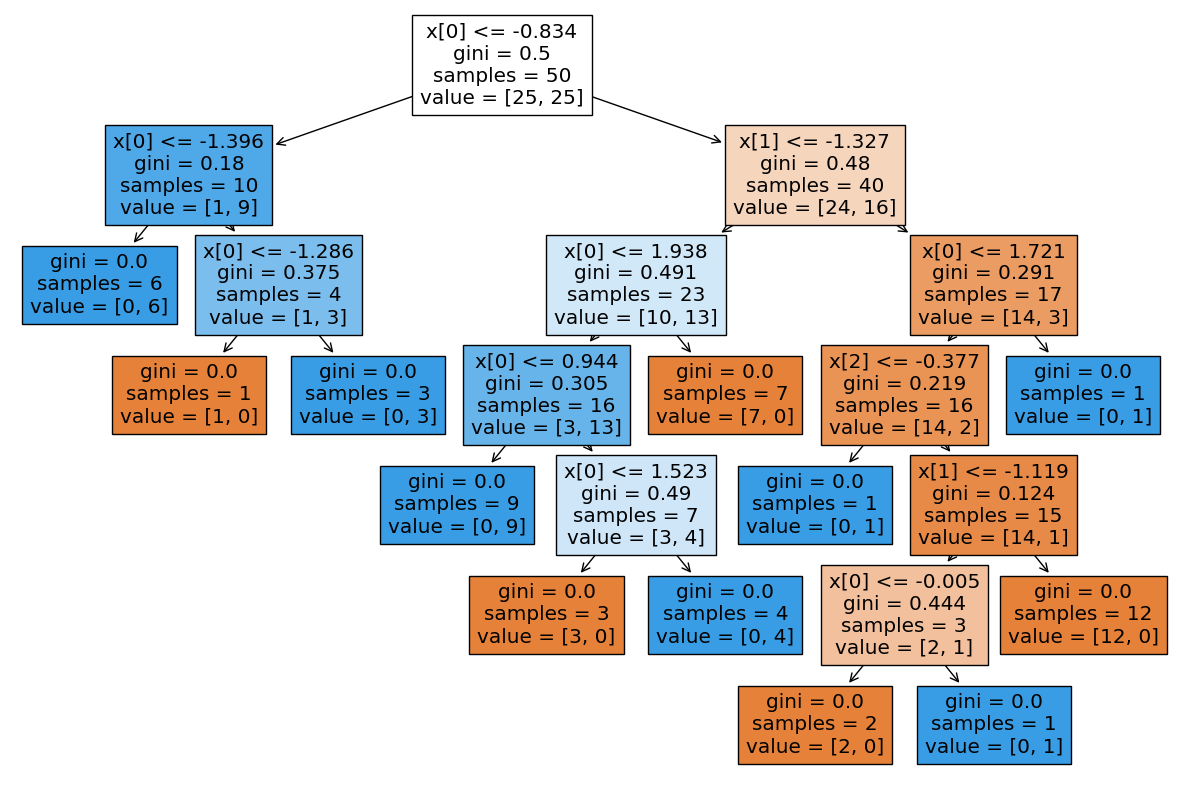

In [124]:
plt.figure(figsize=(15,10))
plot_tree(clf31, filled=True)

[Text(0.5, 0.875, 'x[0] <= 0.057\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.25, 0.625, 'x[2] <= 3.748\ngini = 0.083\nsamples = 23\nvalue = [1, 22]'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 22\nvalue = [0, 22]'),
 Text(0.375, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.625, 'x[1] <= -2.11\ngini = 0.302\nsamples = 27\nvalue = [22, 5]'),
 Text(0.625, 0.375, 'x[2] <= 1.954\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]')]

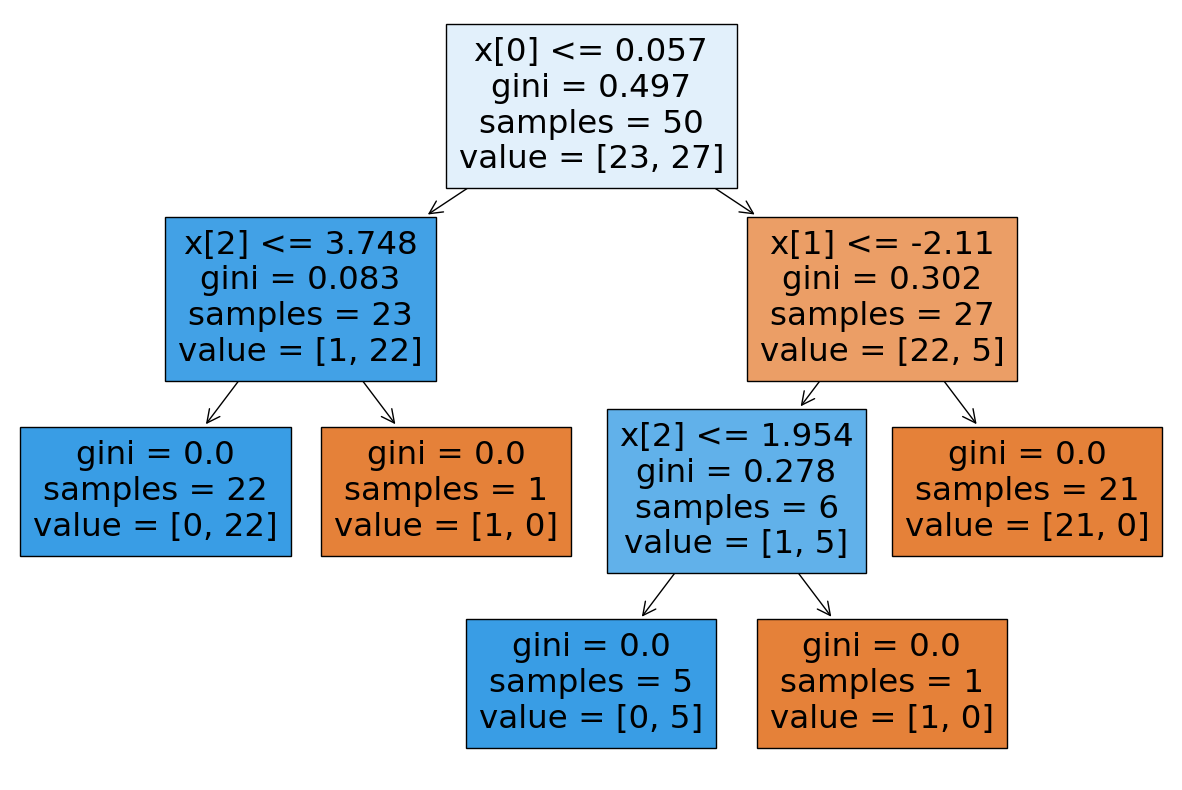

In [125]:
plt.figure(figsize=(15,10))
plot_tree(clf32, filled=True)

In [129]:
clf30.predict(np.array([2.294134 ,	-0.074426 ,	-0.158319]).reshape(1,3))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [130]:
clf31.predict(np.array([2.294134 ,	-0.074426 ,	-0.158319]).reshape(1,3))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [131]:
clf32.predict(np.array([2.294134 ,	-0.074426 ,	-0.158319]).reshape(1,3))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

# DT vs RF

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [134]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [135]:
X.shape

(500, 2)

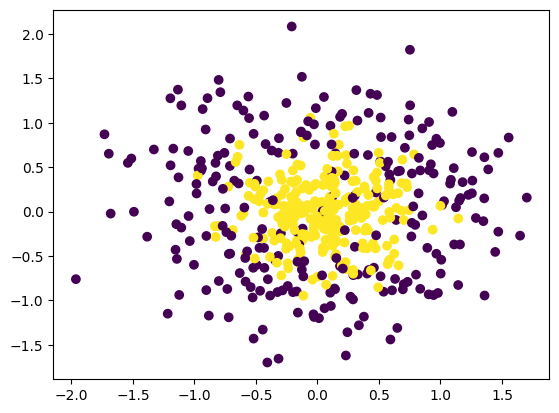

In [136]:
plt.scatter(X[:,0],X[:,1],c=y)

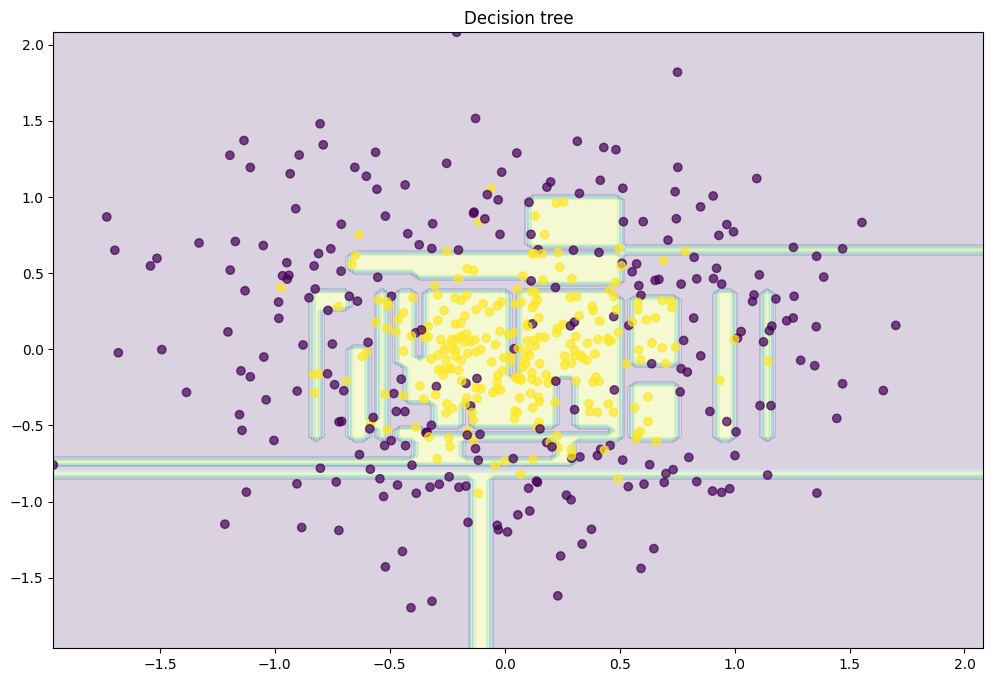

In [137]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Decision tree")
plt.show()

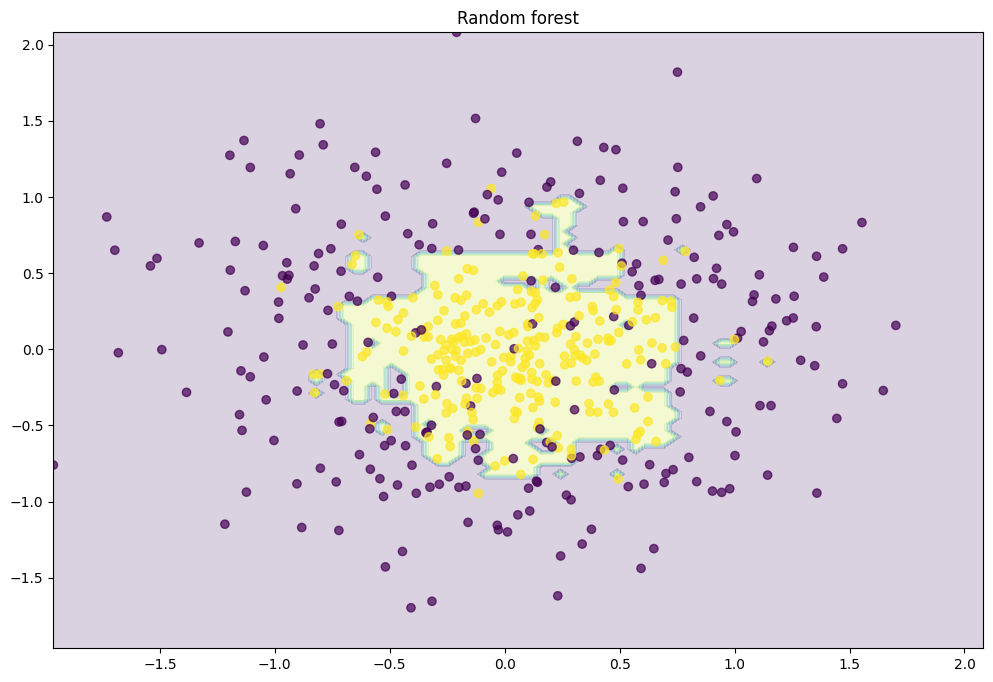

In [139]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Random forest")
plt.show()

In [140]:
n_train = 150
n_test = 1000
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

(-5.0, 5.0)

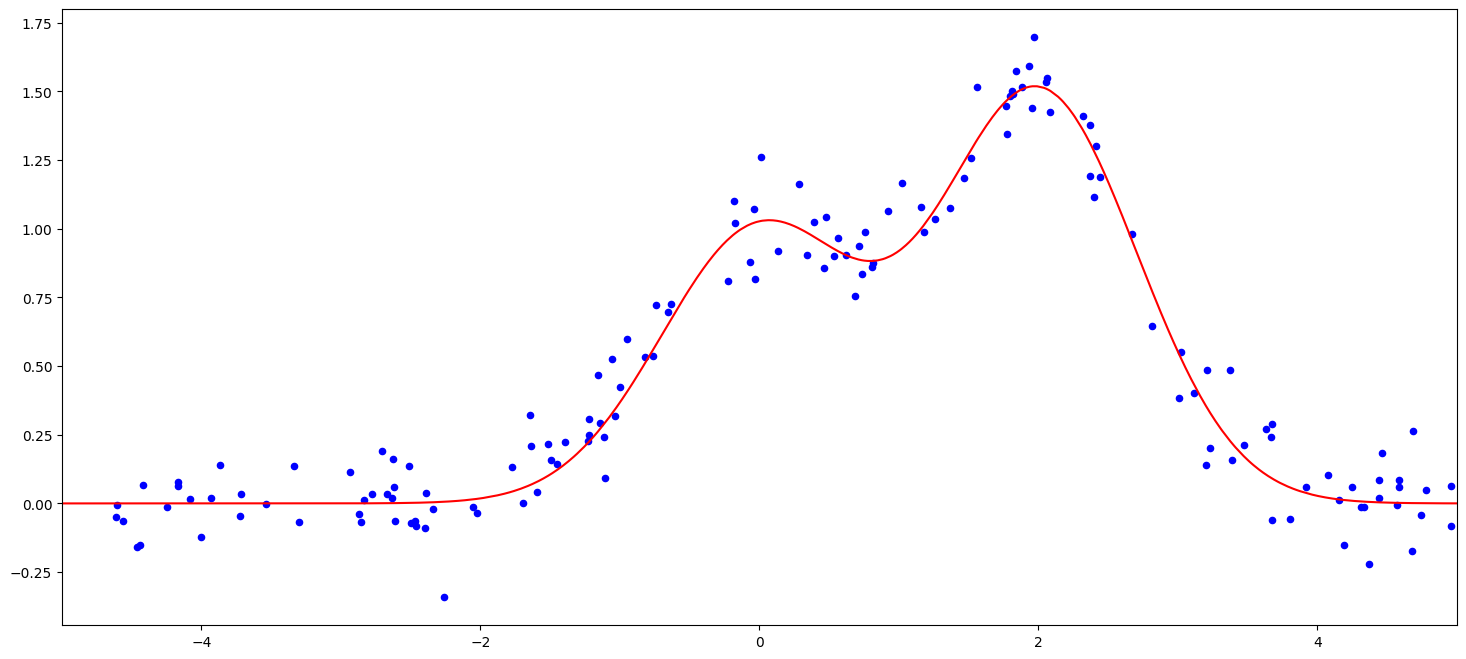

In [141]:
plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.xlim([-5, 5])

Text(0.5, 1.0, 'Decision tree, MSE = 22.70')

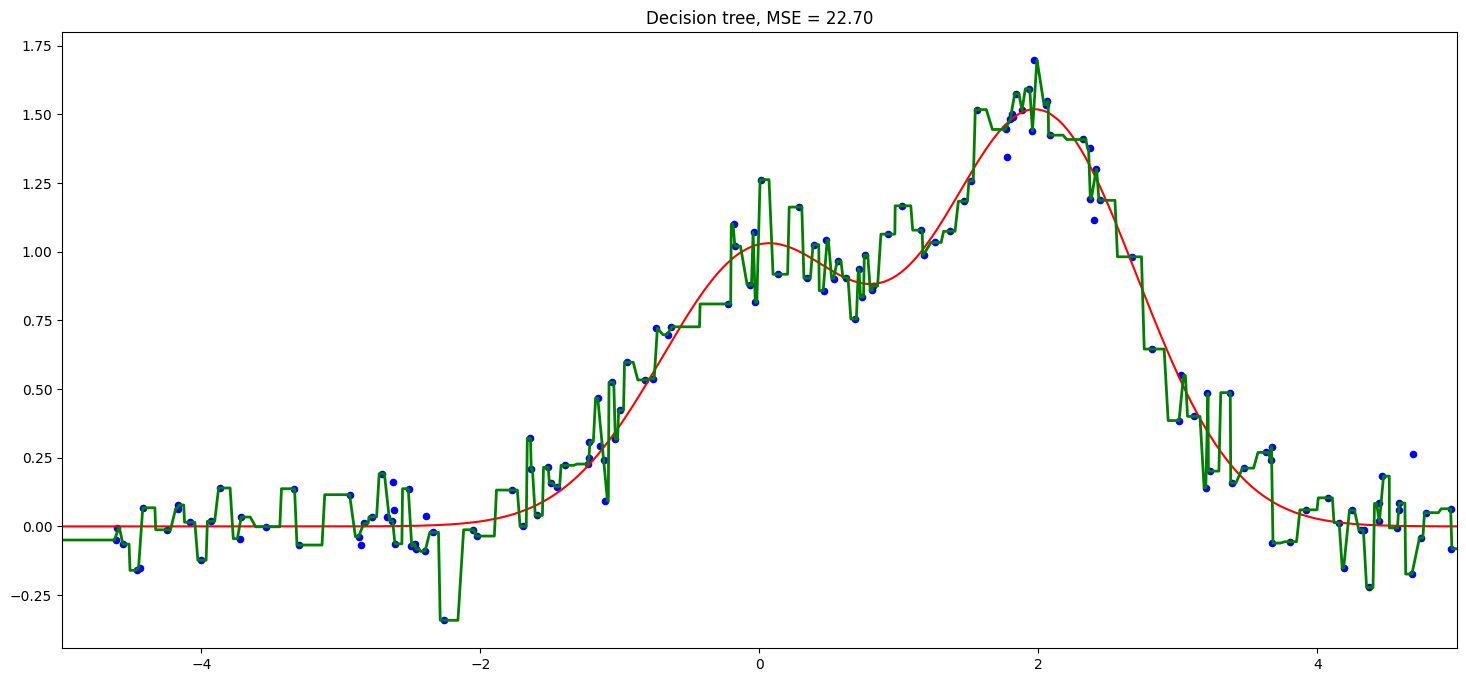

In [142]:
# One decision tree regressor
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f"
          % np.sum((y_test - d_predict) ** 2))

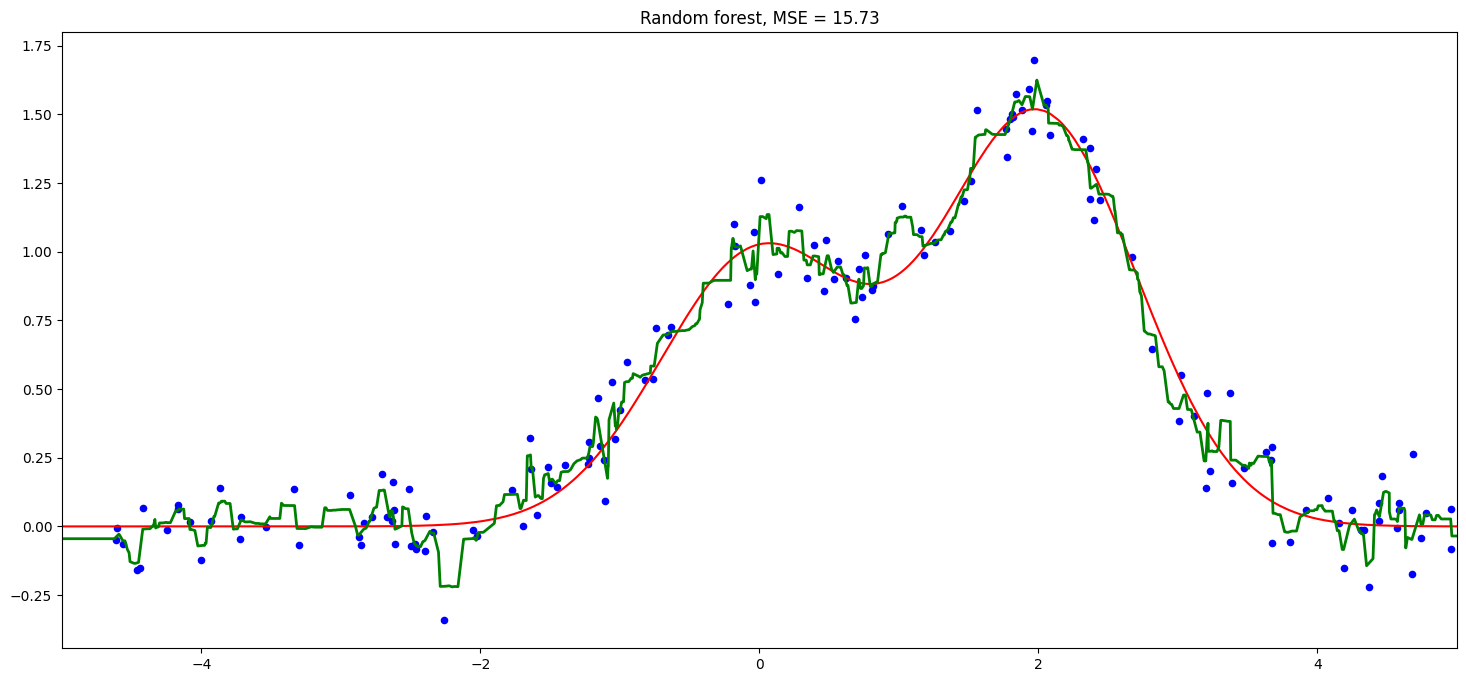

In [143]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
rf_predict = rfr.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));

## Bagging vs Random Forest
In bagging the column sampling is Tree level whereas in random Forest the column sampling is Node level

In [153]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [154]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.852722,-1.966562,-1.604745,2.134992,1.557570,0
1,0.573471,-0.554908,0.829655,-1.360022,-1.184251,1
2,-0.962791,1.203374,0.489616,-1.506092,-0.014139,0
3,-1.859414,-0.853907,0.434475,0.087305,0.550921,0
4,1.710880,-1.750035,1.035996,-0.419150,-1.375958,1


In [166]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier

Feature Sampling in Bagging: Uses all features to build each tree (no feature sampling at the node level).

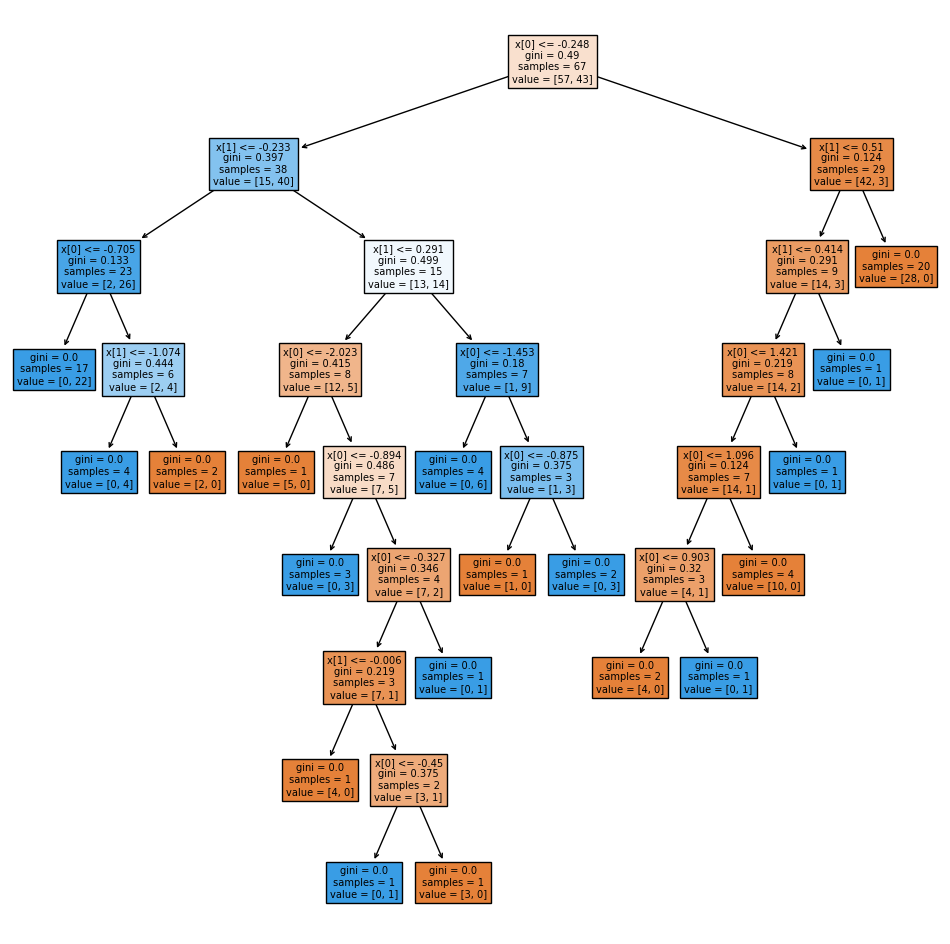

In [156]:
bag = BaggingClassifier(max_features=2)
bag.fit(df.iloc[:,:5],df.iloc[:,-1])
plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[0],filled=True)
plt.show()

Feature Sampling in RF: At each split (node) in each tree, a random subset of features is selected to determine the best split. This is done at the node level, not at the tree level.

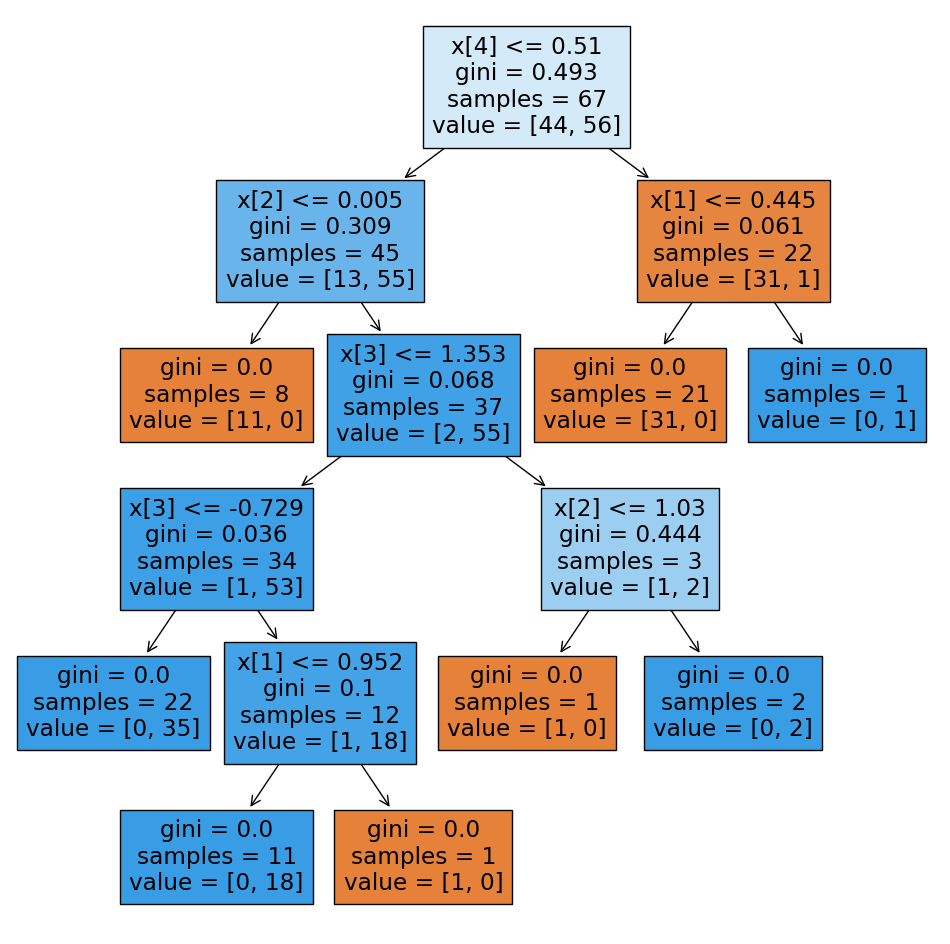

In [157]:
rf = RandomForestClassifier(max_features=2)
rf.fit(df.iloc[:,:5],df.iloc[:,-1])
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4], filled = True)
plt.show()

In [159]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

In [160]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [161]:
df.shape

(303, 14)

In [162]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [163]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [164]:
print(X_train.shape)
print(X_test.shape)

(242, 13)
(61, 13)


In [167]:
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svc = SVC()
lr = LogisticRegression()

In [168]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8688524590163934

In [169]:
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7704918032786885

In [170]:
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test,y_pred)

0.7049180327868853

In [171]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8852459016393442

In [172]:
rf = RandomForestClassifier(max_samples=0.75,random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9016393442622951

In [173]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(RandomForestClassifier(max_samples=0.75),X,y,cv=10,scoring='accuracy'))

0.8348387096774192

##GridSearch CV

In [175]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# 4 x 3 x 3 x 3 = 108 diff random forest train
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [176]:
rf = RandomForestClassifier()

In [177]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = rf,
                       param_grid = param_grid,
                       cv = 5,
                       verbose=2,
                       n_jobs = -1)

In [178]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [179]:
rf_grid.best_params_

{'max_depth': 8, 'max_features': 0.2, 'max_samples': 0.75, 'n_estimators': 120}

In [180]:
rf_grid.best_score_

0.8345238095238094

##RandomizedSearch CV
Faster than Grid search but less accurate and could be used when we are dealing with big data

In [181]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [182]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = RandomizedSearchCV(estimator = rf,
                       param_distributions = param_grid,
                       cv = 5,
                       verbose=2,
                       n_jobs = -1)

In [183]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 397, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/py

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [184]:
rf_grid.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 0.75,
 'max_features': 0.2,
 'max_depth': None,
 'bootstrap': True}

In [185]:
rf_grid.best_score_

0.8262755102040817

In [191]:
rf = RandomForestClassifier(oob_score = True)
rf.fit(X_train,y_train)

RandomForestClassifier(oob_score=True)

In [192]:
rf.oob_score_

0.8099173553719008

In [193]:
y_pred = rf.predict(X_test)

In [194]:
accuracy_score(y_test,y_pred)

0.8524590163934426